In [103]:
import torch
from torch import nn

In [104]:
torch.manual_seed(0)  # 设置随机种子

## 1.1 利用 nn.Module 实现全连接层

In [105]:
""" 定义线性层 Linear 用来计算 y = W x + b """


class Linear(nn.Module):  # 继承 nn.Module
    def __init__(self, in_features, out_features):
        # in_features 输入的形状，out_features 输出的形状
        super().__init__()  # 等价于 nn.Module.__init__(self)
        # nn.Parameter 指定需要网络学习的参数
        self.W = nn.Parameter(torch.randn(in_features, out_features))
        self.b = nn.Parameter(torch.randn(out_features))

    # 前向传播
    def forward(self, x):
        # 计算 y = xW + b : 利用了广播机制，b 会复制成 y 一般大小，即 (out_features,)
        y = x @ self.W + self.b  # @ 代表矩阵乘法
        return y

In [106]:
# 调用上述定义的线性层/全连接层，检查维度
linear_layer = Linear(in_features=4, out_features=3)
inputs = torch.randn(2, 4)
outputs = linear_layer(inputs)
print(outputs.shape)

torch.Size([2, 3])


In [107]:
for name, parameter in linear_layer.named_parameters():
    print("1. It is parameter: {}".format(name))
    print("2.", parameter)
    print("3. The shape is: {}\n".format(parameter.shape))

1. It is parameter: W
2. Parameter containing:
tensor([[ 1.5410, -0.2934, -2.1788],
        [ 0.5684, -1.0845, -1.3986],
        [ 0.4033,  0.8380, -0.7193],
        [-0.4033, -0.5966,  0.1820]], requires_grad=True)
3. The shape is: torch.Size([4, 3])

1. It is parameter: b
2. Parameter containing:
tensor([-0.8567,  1.1006, -1.0712], requires_grad=True)
3. The shape is: torch.Size([3])



## 1.2 利用 nn.Module 实现多层感知机

In [108]:
class MultiPerceptron(nn.Module):
    def __init__(self, in_features, hidden_features, out_features):
        # 新增参数：隐藏层神经元个数（形状）
        super().__init__()
        # 直接使用之前定义的线性层/全连接层 Linear
        self.layer1 = Linear(in_features, hidden_features)
        self.layer2 = Linear(hidden_features, out_features)

    def forward(self, x):
        x = self.layer1(x)
        x = torch.sigmoid(x)  # 使用激活函数，增加非线性因素（此处是逐个元素计算）
        y = self.layer2(x)
        return y

In [109]:
# 检查维度
mlp = MultiPerceptron(3, 4, 1)
inputs = torch.randn(2, 3)
outputs = mlp(inputs)
print(outputs.shape)

torch.Size([2, 1])


In [110]:
# 检查参数
for name, param in mlp.named_parameters():
    print(name, param.size())

layer1.W torch.Size([3, 4])
layer1.b torch.Size([4])
layer2.W torch.Size([4, 1])
layer2.b torch.Size([1])


In [111]:
# batch_size = 1
x = torch.randn(3)
x.unsqueeze_(0)
y = mlp(x)
print(y.shape)

torch.Size([1, 1])


## 2.1 常见网络层：图像相关层

In [112]:
# 卷积层
from PIL import Image
from torchvision.transforms import ToTensor, ToPILImage

In [113]:
to_tensor = ToTensor()  # img -> Tensor
to_pil = ToPILImage()  # Tensor -> PIL

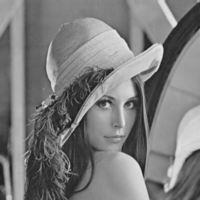

In [114]:
example = Image.open('imgs/lena.png')
example  # 可视化输出

In [115]:
example = to_tensor(example).unsqueeze(0)  # 补充 batch_size
print("Input Size:", example.size())  # 查看 input 维度

Input Size: torch.Size([1, 1, 200, 200])


In [116]:
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=1, padding=0, bias=False)

out = conv(example)
print("Output Size:", out.size())

Output Size: torch.Size([1, 1, 198, 198])


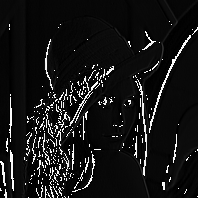

In [117]:
to_pil(out.data.squeeze(0))  # 去除 batch_size 转换为图片输出

In [118]:
# 拓展：指定卷积核
kernel = torch.tensor([
    [1., 0., -1.],
    [1., 0., -1.],
    [1., 0., -1.]
], dtype=torch.float32)

In [119]:
kernel.shape

torch.Size([3, 3])

In [120]:
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(3, 3), stride=1, padding=0, bias=False)
conv.weight.data = kernel.view(1, 1, 3, 3)  # (batch_size, in_channels, height, width)

In [121]:
out = conv(example)
print("Output Size:", out.size())

Output Size: torch.Size([1, 1, 198, 198])


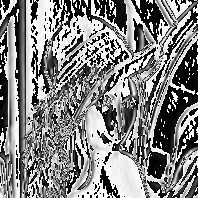

In [122]:
to_pil(out.data.squeeze(0))  # 去除 batch_size 转换为图片输出

In [123]:
# 最大池化

In [124]:
from torch.nn import MaxPool2d

inputs = torch.tensor([
    [1, 2, 0, 2, 1, ],
    [0, 1, 3, 1, 1, ],
    [1, 2, 1, 0, 0, ],
    [5, 2, 3, 1, 1, ],
    [2, 1, 0, 1, 1, ],
], dtype=torch.float)

# 1 batch_size，1 通道，5x5 大小，-1 表示自动计算
inputs = torch.reshape(inputs, (-1, 1, 5, 5))

# 神经网络
max_pool = MaxPool2d(kernel_size=3, ceil_mode=True)

output = max_pool(inputs)
print(output)

tensor([[[[3., 2.],
          [5., 1.]]]])


In [125]:
list(max_pool.parameters())

[]

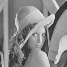

In [126]:
out = max_pool(example)
to_pil(out.data.squeeze(0))  # 输出池化后的lena

In [127]:
out.shape

torch.Size([1, 1, 67, 67])

In [128]:
# 线性层
inputs = torch.randn(2, 3)
linear_out = nn.Linear(3, 4)
out = linear_out(inputs)
out.shape

torch.Size([2, 4])

In [129]:
# Sequential的三种写法
# 法一
net1 = nn.Sequential()
net1.add_module('conv', nn.Conv2d(3, 3, 3))
net1.add_module('batchnorm', nn.BatchNorm2d(3))
net1.add_module('relu', nn.ReLU())

# 法二
net2 = nn.Sequential(
    nn.Conv2d(3, 3, 3),
    nn.BatchNorm2d(3),
    nn.ReLU()
)

# 法三
from collections import OrderedDict

net3 = nn.Sequential(OrderedDict([
    ('conv', nn.Conv2d(3, 3, 3)),
    ('batchnorm', nn.BatchNorm2d(3)),
    ('relu', nn.ReLU())
]))

print('net1:', net1)
print('net2:', net2)
print('net3:', net3)

net1: Sequential(
  (conv): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1))
  (batchnorm): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
)
net2: Sequential(
  (0): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1))
  (1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
)
net3: Sequential(
  (conv): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1))
  (batchnorm): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
)


In [130]:
net1.conv, net2[1], net3.relu

(Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1)),
 BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 ReLU())

In [131]:
# ModuleList
model_list = nn.ModuleList([nn.Linear(3, 4), nn.ReLU(), nn.Linear(4, 2)])
inputs = torch.randn(1, 3)
for model in model_list:
    inputs = model(inputs)  # 一步一步执行，相当于前向传播 forward
inputs.shape

torch.Size([1, 2])

In [132]:
inputs = torch.randn(1, 3)
output = model_list(inputs)  # 报错，没有定义 forward 函数

NotImplementedError: Module [ModuleList] is missing the required "forward" function

In [133]:
# 损失函数

In [134]:
# batch_size=4，即这一组共 4 个样本，类别为 2
score = torch.randn(4, 2)
# 假设 4 个样本的真实类为：1, 0, 1, 1 
label = torch.Tensor([1, 0, 1, 1]).long()  # 分类 label 必须为 LongTensor

# 交叉熵损失 CrossEntropyLoss （常用与计算分类问题的损失）
criterion = nn.CrossEntropyLoss()
loss = criterion(score, label)

print(loss)

tensor(0.5944)


In [138]:
# 生成预测值和真实值
y_pred = torch.randn(4, 1)
y_real = torch.randn(4).squeeze(-1)  # 将 y_real 的形状调整为 (4, 1)

# 初始化 MSE 损失函数
mse = nn.MSELoss()

# 计算损失
loss = mse(y_pred, y_real)

print(loss)

tensor(1.2719)


In [146]:
# nn.functional
inputs = torch.randn(2, 3)

model = nn.Linear(3, 4)
output1 = model(inputs)

In [147]:
# model.weight, model.bias

In [148]:
output2 = nn.functional.linear(inputs, model.weight, model.bias)

In [149]:
print(output1)
print(output2)

tensor([[ 0.8551,  0.0359,  0.7410,  0.3063],
        [-0.0264,  0.1908,  0.7251,  0.7898]], grad_fn=<AddmmBackward0>)
tensor([[ 0.8551,  0.0359,  0.7410,  0.3063],
        [-0.0264,  0.1908,  0.7251,  0.7898]], grad_fn=<AddmmBackward0>)


In [155]:
# 混合使用
from torch.nn import functional as F


class myNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, 16 * 5 * 5)  # 计算池化后的大小
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [170]:
x = torch.randn(64, 3, 32, 32)  # batch_size=64, channels=3, height=32, width=32
model = myNet()
out = model(x)
print(out.shape)

torch.Size([64, 10])


In [171]:
# optim

In [172]:
class MultiPerceptron(nn.Module):
    def __init__(self, in_features, hidden_features, out_features):
        # 新增参数：隐藏层神经元个数（形状）
        super().__init__()
        # 直接使用之前定义的线性层/全连接层 Linear
        self.layer1 = Linear(in_features, hidden_features)
        self.layer2 = Linear(hidden_features, out_features)

    def forward(self, x):
        x = self.layer1(x)
        x = torch.sigmoid(x)  # 使用激活函数，增加非线性因素（此处是逐个元素计算）
        y = self.layer2(x)
        return y

In [173]:
# in_features=3, hidden_features=4, out_features=1
mlp = MultiPerceptron(3, 4, 1)

In [174]:
# 设置优化器和学习率
from torch import optim

learning_rate = 0.9

# 为网络设置学习率，使用随机梯度下降优化器 SGD
optimizer = optim.SGD(params=mlp.parameters(), lr=learning_rate)

# 下面就是网络的训练过程，这里我们只模仿更新一次
optimizer.zero_grad()  # 梯度清零，因为梯度累计效应

inputs = torch.randn(32, 3)  # batch_size=32, in_features=3
output = mlp(inputs)
output.backward(output)  # fake backward

optimizer.step()  # 执行优化

In [176]:
output.shape

torch.Size([32, 1])

In [179]:
# 为不同的参数分别设置不同的学习率
weight_params = [param for name, param in mlp.named_parameters() if name.endswith('.W')]
bias_params = [param for name, param in mlp.named_parameters() if name.endswith('.b')]

optimizer = optim.SGD([
    {'params': bias_params},
    {'params': weight_params, 'lr': 1e-2}
], lr=1e-5)